In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [4]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

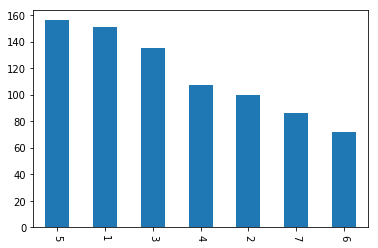

In [12]:
# YOUR CODE HERE
pokemon.generation_id.value_counts().plot(kind='bar',color=base_color)
plt.xticks(rotation=-90)

In [11]:
base_color=sb.color_palette()[0]

In [22]:
pokemon.generation_id.value_counts().index

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

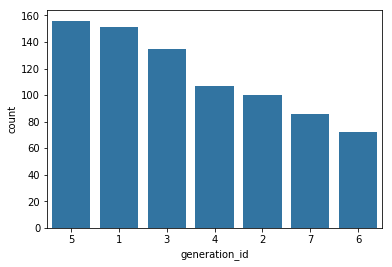

In [23]:
sb.countplot(data=pokemon,x='generation_id',color=base_color,order=pokemon.generation_id.value_counts().index)

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


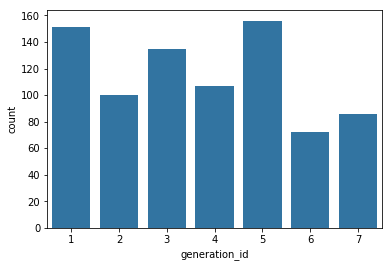

In [8]:
bar_chart_solution_1()

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [6]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [7]:
type(pkmn_types['id'])

pandas.core.series.Series

Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [9]:
# YOUR CODE HERE
#pkmn_types.type_level.unique()
max_val=pkmn_types.type_level.value_counts().max()
print(max_val)
print(type(max_val))
tot=pkmn_types['type_level'].value_counts().tolist()
print(tot)
print(type(tot))
popr_list=[(i/max_val) for i in tot]
print(popr_list)

807
<class 'numpy.int64'>
[807, 405]
<class 'list'>
[1.0, 0.5018587360594795]


I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


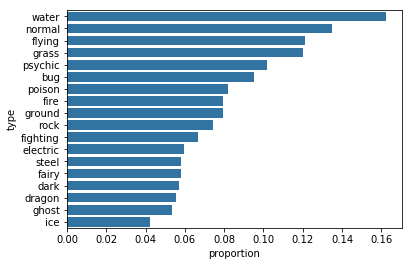

In [10]:
bar_chart_solution_2()

Text(0.5,0,'proportion')

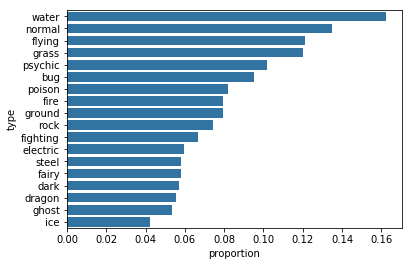

In [11]:
    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index

    # compute largest proportion
    n_pokemon = pkmn_types['species'].unique().shape[0]
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')

In [20]:
pkmn_types['species'].unique().shape[0]

807

In [18]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

In [17]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!